<a href="https://colab.research.google.com/github/A-Wadhwani/CS448-Project2/blob/master/CS448_Project_2_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("resultsEquals.csv", index_col=None)
df.loc[df["Join Algorithm"] == "Index Join", "Join Algorithm"] = "Index"
df.loc[df["Join Algorithm"] == "Merge Join", "Join Algorithm"] = "Merge"
df.loc[df["Join Algorithm"] == "Block Nested Loop Join", "Join Algorithm"] = "Block Nested"
df.loc[df["Join Algorithm"] == "Multi Buffer Product and Select", "Join Algorithm"] = "Cross Product"
df.head()

,Input Size,Join Algorithm,Runtime,Block Guess,Records Count,Hits,Misses
0,200,Index,20,3,0,2,23
1,200,Block Nested,10,68,200,271,86
2,200,Cross Product,206,75,200,30,220
3,200,Merge,1763,68,200,8,1065
4,600,Index,6,9,0,13,248


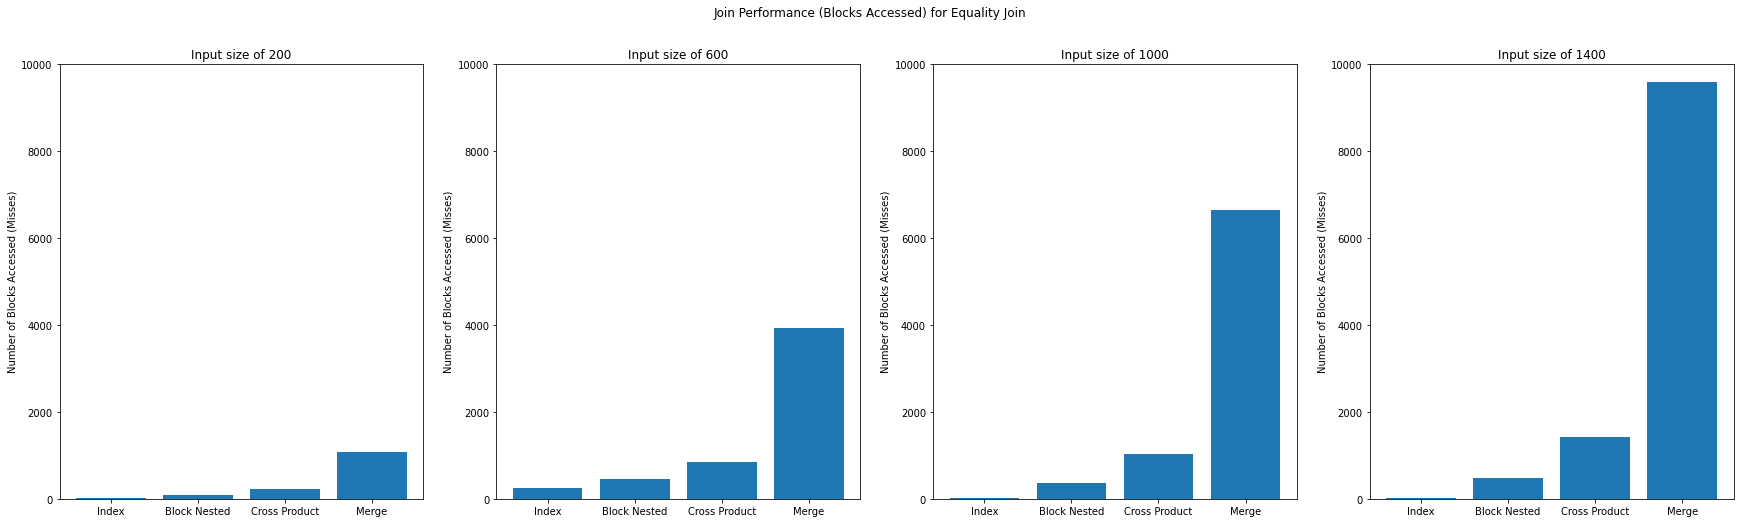

In [33]:
fig, axs = plt.subplots(1, 4, figsize=(30,8))
fig.suptitle("Join Performance (Blocks Accessed) for Equality Join")
val = 200
for ax in axs:
  n500 = df[df['Input Size']==val]
  ax.bar(n500["Join Algorithm"], n500["Misses"])
  ax.title.set_text("Input size of " + str(val))
  ax.set_ylim(0, 10000)
  ax.set(ylabel="Number of Blocks Accessed (Misses)")
  val += 400

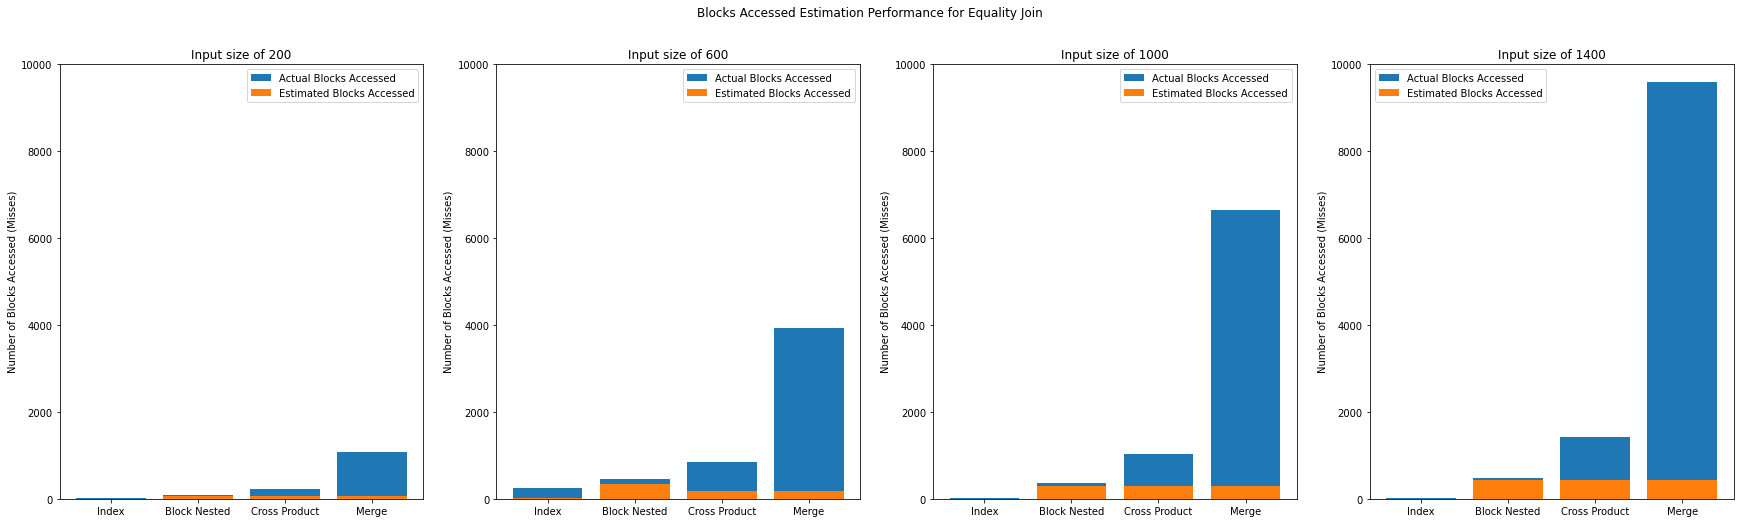

In [32]:
fig, axs = plt.subplots(1, 4, figsize=(30,8))
fig.suptitle("Blocks Accessed Estimation Performance for Equality Join")
val = 200
for ax in axs:
  n500 = df[df['Input Size']==val]
  ax.bar(n500["Join Algorithm"], n500["Misses"], label="Actual Blocks Accessed")
  ax.bar(n500["Join Algorithm"], n500["Block Guess"], label="Estimated Blocks Accessed")
  ax.title.set_text("Input size of " + str(val))
  ax.set_ylim(0, 10000)
  ax.set(ylabel="Number of Blocks Accessed (Misses)")
  ax.legend()
  val += 400

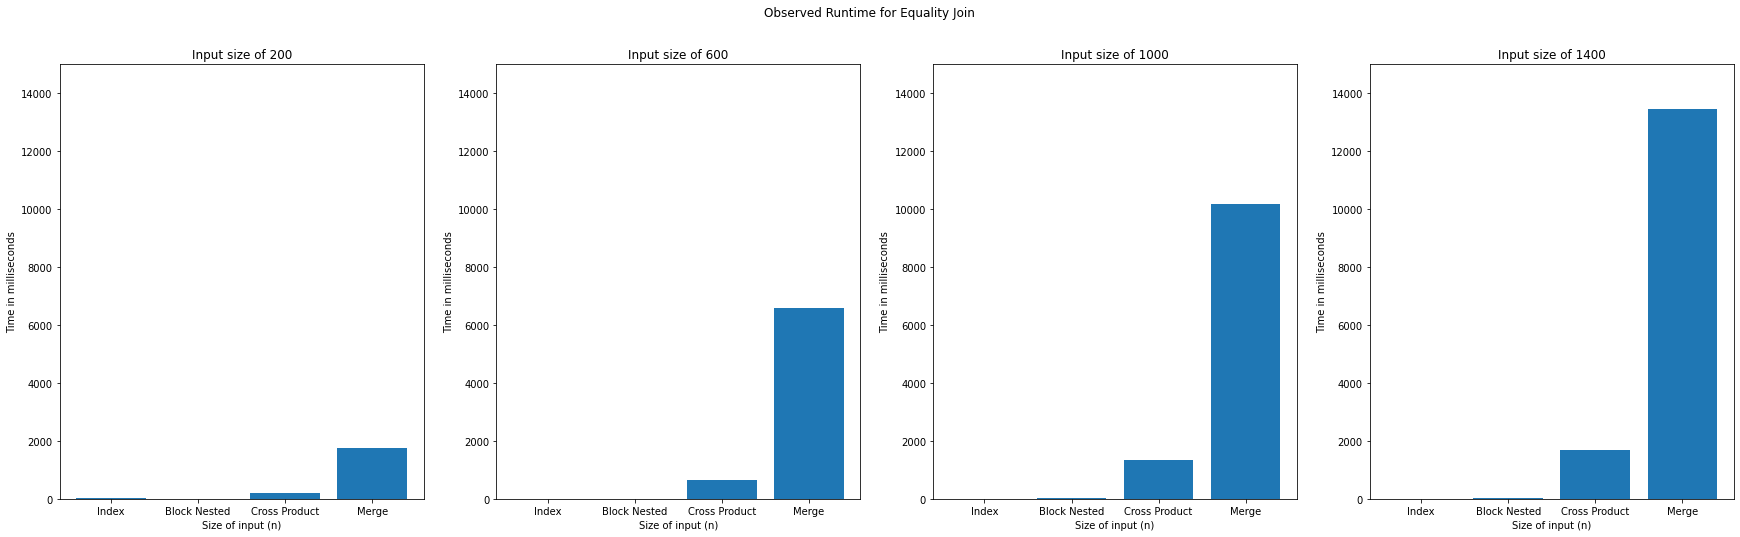

In [31]:
fig, axs = plt.subplots(1, 4, figsize=(30,8))
fig.suptitle("Observed Runtime for Equality Join")
val = 200
for ax in axs:
  n500 = df[df['Input Size']==val]
  ax.bar(n500["Join Algorithm"], n500["Runtime"])
  ax.set_ylim(0, 15000)
  ax.title.set_text("Input size of " + str(val))
  ax.set(xlabel="Size of input (n)", ylabel="Time in milliseconds")
  val += 400

In [20]:
df1 = pd.read_csv("resultsLessThan.csv", index_col=None)
df1.loc[df["Join Algorithm"] == "Block Nested Loop Join", "Join Algorithm"] = "Block Nested"
df1.loc[df["Join Algorithm"] == "Multi Buffer Product and Select", "Join Algorithm"] = "Cross Product"
df1.head()

,Input Size,Join Algorithm,Runtime,Block Guess,Records Count,Hits,Misses
0,200,Block Nested Loop Join,4,68,298,271,86
1,200,Multi Buffer Product and Select,175,75,298,30,220
2,600,Block Nested Loop Join,27,336,898,614,444
3,600,Multi Buffer Product and Select,733,189,898,93,844
4,1000,Block Nested Loop Join,33,304,1480,1340,352


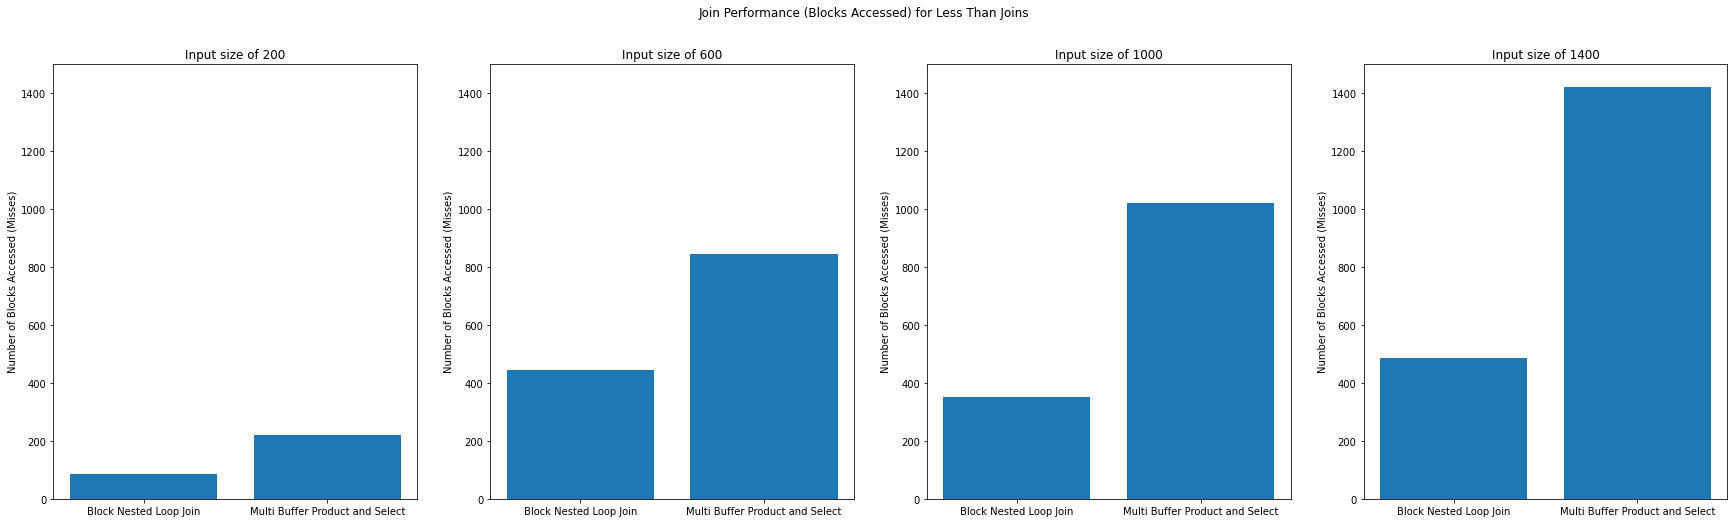

In [30]:
fig, axs = plt.subplots(1, 4, figsize=(30,8))
fig.suptitle("Join Performance (Blocks Accessed) for Less Than Joins")
val = 200
for ax in axs:
  n500 = df1[df1['Input Size']==val]
  ax.bar(n500["Join Algorithm"], n500["Misses"])
  ax.title.set_text("Input size of " + str(val))
  ax.set_ylim(0, 1500)
  ax.set(ylabel="Number of Blocks Accessed (Misses)")
  val += 400

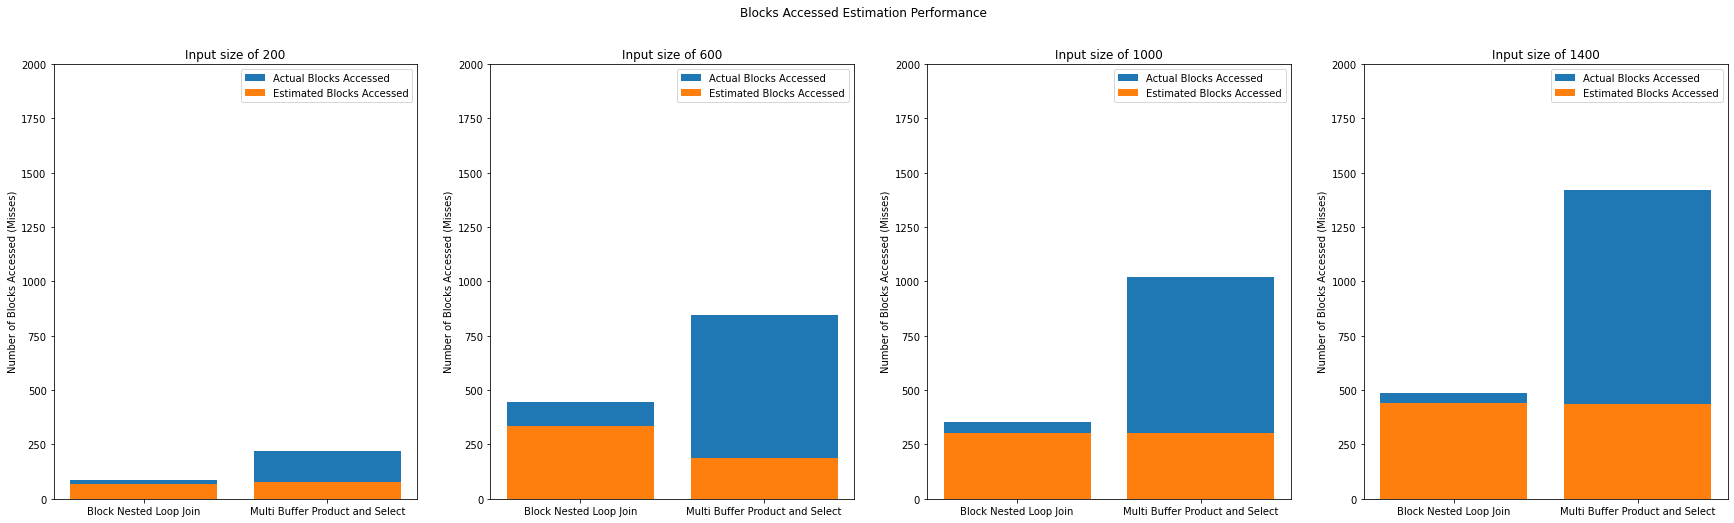

In [25]:
fig, axs = plt.subplots(1, 4, figsize=(30,8))
fig.suptitle("Blocks Accessed Estimation Performance for Less Than Joins")
val = 200
for ax in axs:
  n500 = df1[df1['Input Size']==val]
  ax.bar(n500["Join Algorithm"], n500["Misses"], label="Actual Blocks Accessed")
  ax.bar(n500["Join Algorithm"], n500["Block Guess"], label="Estimated Blocks Accessed")
  ax.title.set_text("Input size of " + str(val))
  ax.set_ylim(0, 2000)
  ax.set(ylabel="Number of Blocks Accessed (Misses)")
  ax.legend()
  val += 400

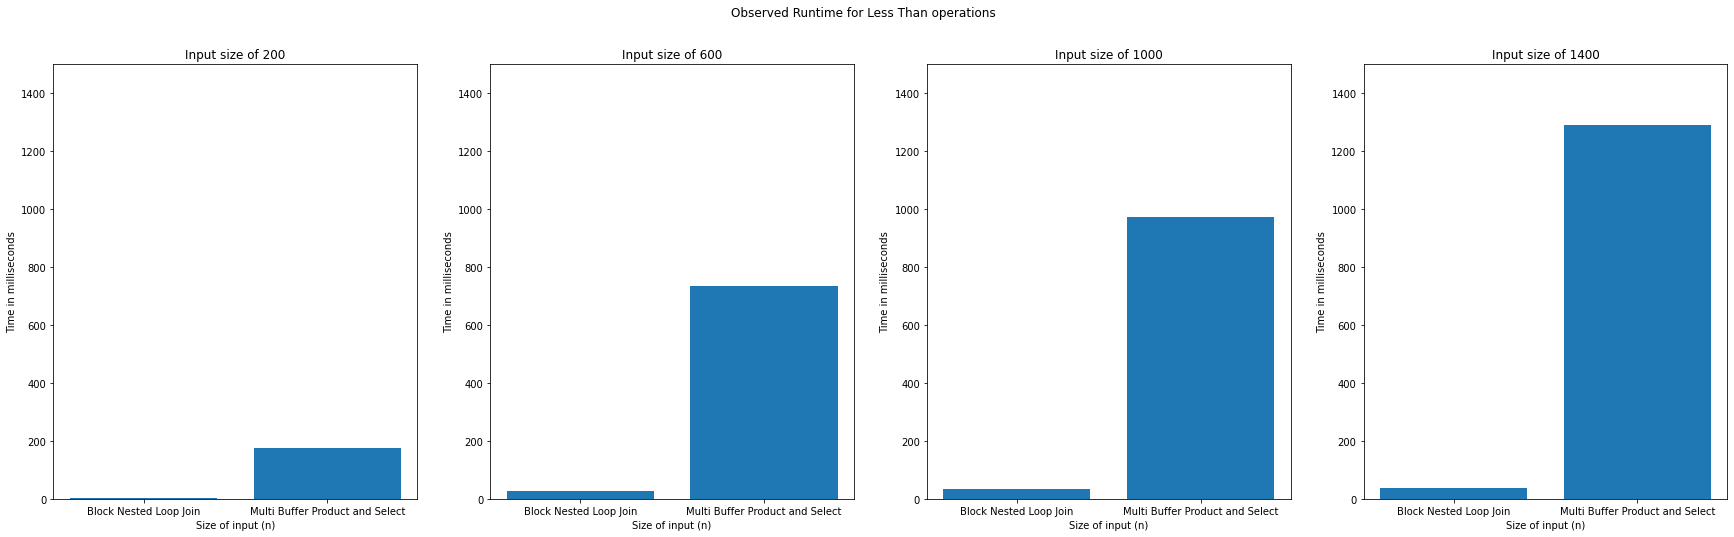

In [29]:
fig, axs = plt.subplots(1, 4, figsize=(30,8))
fig.suptitle("Observed Runtime for Less Than Joins")
val = 200
for ax in axs:
  n500 = df1[df1['Input Size']==val]
  ax.bar(n500["Join Algorithm"], n500["Runtime"])
  ax.set_ylim(0, 1500)
  ax.title.set_text("Input size of " + str(val))
  ax.set(xlabel="Size of input (n)", ylabel="Time in milliseconds")
  val += 400